In [1]:
%matplotlib inline


# Recognizing hand-written digits


An example showing how the scikit-learn can be used to recognize images of
hand-written digits.

This example is commented in the
`tutorial section of the user manual <introduction>`.




In [36]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

from ipywidgets import interact_manual

In [3]:
# The digits dataset
digits = datasets.load_digits()

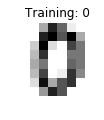

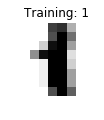

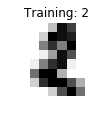

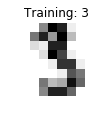

In [4]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
    plt.show()

In [6]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [9]:
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1 

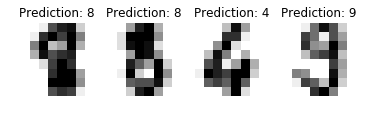

In [14]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()

## Clasificador de Vecinos Cercanos

In [7]:
neigh = None

@interact_manual(k=(1, 20))
def make_nn_classifier(k):
    global neigh
    neigh = KNeighborsClassifier(n_neighbors=k)
    print('training...')
    neigh.fit(data[:n_samples // 2], digits.target[:n_samples // 2])
    print('done!')
    print(neigh)

A Jupyter Widget

In [11]:
# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = neigh.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (neigh, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

          0       0.98      1.00      0.99        88
          1       0.95      0.98      0.96        91
          2       0.98      0.93      0.95        86
          3       0.89      0.91      0.90        91
          4       1.00      0.93      0.97        92
          5       0.95      0.98      0.96        91
          6       0.99      1.00      0.99        91
          7       0.94      1.00      0.97        89
          8       0.96      0.88      0.92        88
          9       0.92      0.93      0.93        92

avg / total       0.96      0.95      0.95       899


Confusion matrix:
[[88  0  0  0  0  0  0  0  0  0]
 [ 0 89  0  0  0  1  0  0  0  1]
 [ 1  0 80  5  0  0  0  0  0  0]
 [ 0  0  0 83  0  2  0  4  1  1]
 [ 1  0

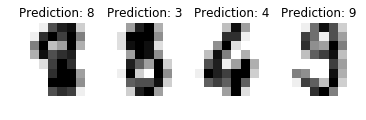

In [12]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)
plt.show()

## KNN No Supervisado

In [41]:
neigh = None
kk = None
rr = None
algo = None
@interact_manual(k=(1, 20), 
                 r=(0, 50, 0.1),
                 algorithm=['auto', 'ball_tree', 'kd_tree', 'brute'])
def make_knn(k, r, algorithm):
    global neigh
    global kk, rr, algo
    kk, rr, algo = k, r, algorithm
    neigh = NearestNeighbors(n_neighbors=k, radius=r, algorithm=algorithm)
    print('training...')
    neigh.fit(data[:n_samples // 2])
    print('done!')
    print(neigh)

A Jupyter Widget

In [42]:
# Now predict the value of the digit on the second half:
distances, indices = neigh.kneighbors(data[n_samples // 2:], 4)

In [43]:
distances

array([[ 12.92284798,  22.47220505,  24.87971061,  26.70205985],
       [ 26.45751311,  27.11088342,  27.62245463,  28.14249456],
       [ 18.70828693,  20.174241  ,  21.58703314,  21.9544984 ],
       ..., 
       [ 20.83266666,  21.70253441,  22.93468988,  25.63201124],
       [ 19.5192213 ,  21.09502311,  23.87467277,  24.69817807],
       [ 26.73948391,  27.62245463,  27.80287755,  27.92848009]])

In [44]:
indices

array([[890, 816, 829, 439],
       [449, 802, 446, 469],
       [366, 876, 897, 817],
       ..., 
       [148, 248, 242, 255],
       [254, 251, 849, 417],
       [183, 248, 513, 224]])

In [40]:
neigh.kneighbors_graph(data[n_samples // 2:], n_neighbors=kk).toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [32]:
help(neigh.kneighbors_graph)

Help on method kneighbors_graph in module sklearn.neighbors.base:

kneighbors_graph(X=None, n_neighbors=None, mode='connectivity') method of sklearn.neighbors.unsupervised.NearestNeighbors instance
    Computes the (weighted) graph of k-Neighbors for points in X
    
    Parameters
    ----------
    X : array-like, shape (n_query, n_features),                 or (n_query, n_indexed) if metric == 'precomputed'
        The query point or points.
        If not provided, neighbors of each indexed point are returned.
        In this case, the query point is not considered its own neighbor.
    
    n_neighbors : int
        Number of neighbors for each sample.
        (default is value passed to the constructor).
    
    mode : {'connectivity', 'distance'}, optional
        Type of returned matrix: 'connectivity' will return the
        connectivity matrix with ones and zeros, in 'distance' the
        edges are Euclidean distance between points.
    
    Returns
    -------
    A : spar